# Text Pre Processing

The process of converting data to something a computer can understand is referred to as pre-processing

### Data Pull

In [1]:
# import libraries
import pandas as pd
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kahuja4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kahuja4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [4]:
cd data

C:\Users\kahuja4\Desktop\Desktop(Files)\Data_Science(Python,Stat,ML,Feature_Engineering)\Sentiment Analysis\data


In [9]:
# read csv

data =  pd.read_csv('train.csv',usecols=['label','tweet'])

pd.set_option('display.max_colwidth', -1)

data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,0,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,0,factsguide: society now #motivation


###  Check whether the data has upper case letters

In [13]:
data.loc[data['tweet'].str.isupper()==True]

,label,tweet


### Remove digits, non ascii characters other than "#"  from the data

In [18]:
text1 = "@user when a #father is (dysfunctional and is so selfish he drags his kids"
text2=re.sub("[^a-zA-Z#]"," ",text1)
text2



' user when a #father is  dysfunctional and is so selfish he drags his kids'

In [20]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove twitter handles
    text=re.sub("@[\w]*"," ",text)
    
    #remove non-ascii (except #) and digits
    text=re.sub("[^a-zA-Z#]"," ",text)
    
    #remove whitespace
    text=text.strip()
    
    return text

data['scrub_text'] = np.vectorize(scrub_words)(data['tweet'])

data.head()

,label,tweet,scrub_text
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now #motivation


### Remove Stop words

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

### Question - Remove all stop words other than "now" from nltk.corpus

In [21]:
stop = stopwords.words('english')
# l1 =["now","a"]
data['cleaned_tweet'] = data['scrub_text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop ))
data.head()

,label,tweet,scrub_text,cleaned_tweet
0,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run,father dysfunctional selfish drags kids dysfunction #run
1,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked,thanks #lyft credit use cause offer wheelchair vans pdx #disapointed #getthanked
2,0,bihday your majesty,bihday your majesty,bihday majesty
3,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur,#model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society now #motivation,factsguide society #motivation


### Question - Plot the top 'n' hashtags

For  non-racist/sexist tweets (label = 0) : 
- Extract Hashtagged words (words starting with "#")
- Count the frequency of occurence of each word
- Create a barplot for top 20 words


For  racist/sexist tweets (label = 1) : 
- Extract Hashtagged words (words starting with "#")
- Count the frequency of occurence of each word
- Create a barplot for top 20 words

In [22]:
#  function to extract hashtagged words

def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

# extract words from non-racist/sexist tweets 
list_positive = hashtag_extract(data.loc[data.label==0,"cleaned_tweet"])

# extract words from racist/sexist tweets 
list_negative = hashtag_extract(data.loc[data.label==1,"cleaned_tweet"])


In [23]:
list_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peace'],
 [],
 ['race', 'identity', 'med'],
 ['altright', 'whitesupremacy'],
 ['linguistics', 'race', 'power', 'raciolinguistics'],
 ['brexit'],
 ['people', 'trump', 'republican'],
 ['michelleobama'],
 ['knicks', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyping', 'prejudice', 'hope', 'hate', 'conflict'],
 ['pols', 'bluelivesmatter', 'draintheswamp', 'ferguson'],
 [],
 ['antisemitism', 'hocoschools', 'columbiamd', 'hocomd'],
 ['nazi', 'hatred', 'bigotry'],
 ['libtard', 'sjw', 'liberal', 'politics'],
 ['p', 'p', 'fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatter'],
 ['ushistory', 'eugenics'],
 ['biherism', 'bigotry', 'altright', 'potus', 'theresistance'],
 ['crime', 'officer'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahs

In [24]:
list_positive

[['run'],
 ['lyft', 'disapointed', 'getthanked'],
 [],
 ['model'],
 ['motivation'],
 ['allshowandnogo'],
 [],
 ['school',
  'exams',
  'hate',
  'imagine',
  'actorslife',
  'revolutionschool',
  'girl'],
 ['allin', 'cavs', 'champions', 'cleveland', 'clevelandcavaliers'],
 ['gr'],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshooting',
  'orlandoshooting',
  'biggerproblems',
  'selfish',
  'heabreaking',
  'values',
  'love'],
 ['gettingfed'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thankful', 'positive'],
 ['friday', 'cookies'],
 [],
 ['euro'],
 ['badday', 'coneofshame', 'cats', 'pissed', 'funny', 'laughs'],
 ['wine', 'weekend'],
 ['tgif', 'ff', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssas', 'love'],
 ['smiles', 'media', 'pressconference', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevibes', 'hawaiian'],
 [],
 ['goodnig

In [25]:
#  create a flat list and count frequency of each word

def CountFrequency(my_list): 
    
    flat_list = [item for sub_list in my_list for item in sub_list]
    
    freq = {} 
    
    for item in flat_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
            
    return freq

# #  to get the indices of a particular word
# x = [i for i in range(len(flat_list)) if flat_list[i] == "beautiful"]
# x

            
count_positive = CountFrequency(list_positive)
count_negative = CountFrequency(list_negative)



In [26]:
count_negative

{'cnn': 10,
 'michigan': 2,
 'tcot': 14,
 'australia': 6,
 'opkillingbay': 5,
 'seashepherd': 22,
 'helpcovedolphins': 3,
 'thecove': 4,
 'neverump': 8,
 'xenophobia': 12,
 'love': 11,
 'peace': 8,
 'race': 14,
 'identity': 1,
 'med': 1,
 'altright': 18,
 'whitesupremacy': 6,
 'linguistics': 1,
 'power': 2,
 'raciolinguistics': 1,
 'brexit': 27,
 'people': 11,
 'trump': 136,
 'republican': 11,
 'michelleobama': 8,
 'knicks': 1,
 'golf': 1,
 'jewishsupremacist': 1,
 'libtard': 76,
 'sjw': 74,
 'liberal': 75,
 'politics': 95,
 'trash': 1,
 'hate': 33,
 'stereotyping': 1,
 'prejudice': 3,
 'hope': 5,
 'conflict': 1,
 'pols': 1,
 'bluelivesmatter': 3,
 'draintheswamp': 3,
 'ferguson': 2,
 'antisemitism': 8,
 'hocoschools': 2,
 'columbiamd': 2,
 'hocomd': 2,
 'nazi': 12,
 'hatred': 18,
 'bigotry': 21,
 'p': 8,
 'fyi': 2,
 'topoli': 1,
 'blacklivesmatter': 19,
 'ushistory': 2,
 'eugenics': 3,
 'biherism': 2,
 'potus': 5,
 'theresistance': 12,
 'crime': 2,
 'officer': 1,
 'black': 44,
 'retwe

In [27]:
# create df from dictionary

df_positive = pd.DataFrame({'Hashtag': list(count_positive.keys()),'Count': list(count_positive.values())})

df_negative = pd.DataFrame({'Hashtag': list(count_negative.keys()),'Count': list(count_negative.values())})


In [40]:
df_negative.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


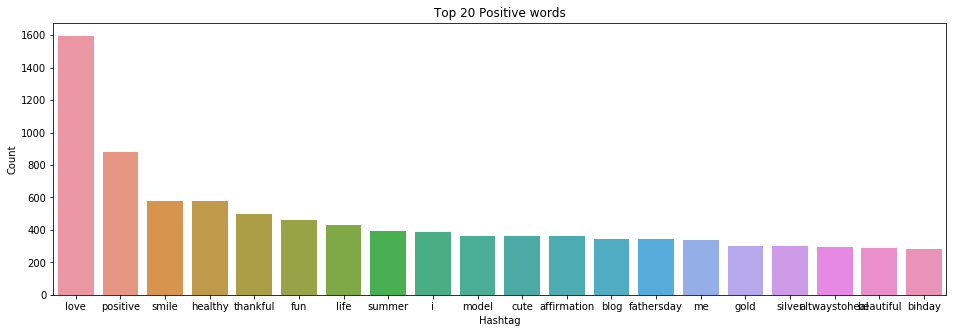

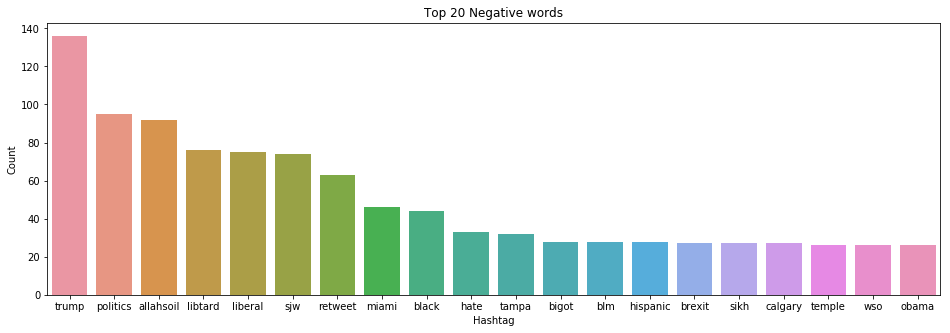

In [44]:
import matplotlib.pyplot as plt 
import seaborn as sns

def plot_bar(df,title,n,x,y):
    
    df = df.nlargest(columns="Count", n = n) 
    
    plt.figure(figsize=(16,5))
    ax = sns.barplot(data=df, x=x, y=y).set_title(title)
    plt.show()
    
    return df


df_pos = plot_bar(df_positive,"Top 20 Positive words",20,"Hashtag","Count")
df_neg = plot_bar(df_negative,"Top 20 Negative words",20,"Hashtag","Count")

# df_pos.show()
# df_neg.show()

# Stemming and Lemmetisation

Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. 

In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

In [45]:
# init lemmatizer
lemmatizer = WordNetLemmatizer()

# init stemmer
porter_stemmer=PorterStemmer()

words=["trouble","troubled","troubling","troubles"]
stemmed_words=[porter_stemmer.stem(word=word) for word in words]

stemdf= pd.DataFrame({'original_word': words,'stemmed_word': stemmed_words})
# stemdf

words=["trouble","troubling","troubled","troubles"]
lemmatized_words=[lemmatizer.lemmatize(word=word,pos='v') for word in words]

lemmatizeddf1= pd.DataFrame({'original_word': words,'lemmatized_word': lemmatized_words})


In [59]:
print(stemdf,'\n',lemmatizeddf1)

  original_word stemmed_word
0  trouble       troubl     
1  troubled      troubl     
2  troubling     troubl     
3  troubles      troubl      
   original_word lemmatized_word
0  trouble       trouble       
1  troubling     trouble       
2  troubled      trouble       
3  troubles      trouble       


In [60]:
#lemmatize goose variations with part of speech

words=["goose","geese"]
lemmatized_words=[lemmatizer.lemmatize(word=word,pos='n') for word in words]

lemmatizeddf2= pd.DataFrame({'original_word': words,'lemmatized_word': lemmatized_words})

lemmatizeddf2

,original_word,lemmatized_word
0,goose,goose
1,geese,goose


# Lexicon Based Method for Sentiment Analysis

### Using VADER (Valence Aware Dictionary and sEntiment Reasoner) for finding top positive and negative tweets

VADER is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.

VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.


For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [61]:

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kahuja4\AppData\Roaming\nltk_data...


C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [62]:
vader_input=data[['cleaned_tweet']].copy()
vader_input.columns

# Remove #
vader_input['cleaned_tweet'] =vader_input['cleaned_tweet'].str.replace('#',' ')
vader_input.head()

,cleaned_tweet
0,father dysfunctional selfish drags kids dysfunction run
1,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
2,bihday majesty
3,model love u take u time ur
4,factsguide society motivation


In [63]:
analyzer = SentimentIntensityAnalyzer()

vader_scores=pd.DataFrame()
for index, row in vader_input.head(1000).iterrows():
    scores = analyzer.polarity_scores(row['cleaned_tweet'])
    df=pd.DataFrame({'scores': [scores['compound']],'tweet': [row['cleaned_tweet']]})
    vader_scores=vader_scores.append(df)
    
vader_scores.head()

,scores,tweet
0,-0.7650,father dysfunctional selfish drags kids dysfunction run
0,0.6705,thanks lyft credit use cause offer wheelchair vans pdx disapointed getthanked
0,0.0000,bihday majesty
0,0.6369,model love u take u time ur
0,0.3400,factsguide society motivation


In [68]:
vader_scores.sort_values(by='scores',ascending=True,inplace=True)
vader_scores.head(20)

,scores,tweet
0,-0.9595,standing racism hate americad curse congress haters deplorable hate
0,-0.9482,hate like family really born big ass toxic bomb mother fuckers give fuck cuz got money
0,-0.9287,carrying gun helped take gun control stop black market terrorism get worse
0,-0.9246,got call yesterday mom diagnosed stage ovarian cancer terrified terrified know
0,-0.9186,opinion racism degrading people based race justify discrimination open violence stopracism
0,-0.9169,fo woh officer viral arrest video rude racist chief crime officer
0,-0.9136,watching leadership embrace amp kiss donald ass pathetic amp pay pay racism amp hate ripgop
0,-0.9062,shocking events orlando usa review gun laws innocents die first horrific unforgiveable
0,-0.8910,watch fancy tails vine mad mad teeth bite pissed dog biting dogbite dogtreat
0,-0.8860,brainwashed left allowing terrorist come america kill


In [69]:
vader_scores.tail(20)

,scores,tweet
0,0.9337,thankful friends thankful positive
0,0.9337,feels like summer love like live life enjoy healthy sun tan bikini summer
0,0.9349,thankful sunshine thankful positive
0,0.9382,stay strong selflove love iloveme quote quotes quoteoftheday happiness life wisdom wordsofwisdom
0,0.9382,happy face lovely smile satisfying hair workit smile face
0,0.9403,happy man success model entrepreneur speaker ff fresh confident fashion
0,0.9413,lover stop angry visit us gt gt gt lover friend astrologer love
0,0.9413,happiness vs joy happiness temporary leaves u hu joy last forever never leaves real tru
0,0.9442,lt listen beautiful best friend singing amazing voice lt lt lt lt
0,0.9468,thank soo much pretty feel soo blessed amp lucky plz keep showering ur lyks surprised likes unexpected


In [70]:
combi=data.copy()

__4. Text Normalization__

Here we will use nltk's PorterStemmer() function to normalize the tweets. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [72]:
tokenized_tweet = combi['cleaned_tweet'].apply(lambda x: x.split()) # tokenizing

Now we can normalize the tokenized tweets.

In [73]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

Now let’s stitch these tokens back together.

In [74]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['cleaned_tweet'] = tokenized_tweet

## Extracting Features from Cleaned Tweets

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
# import gensim

### Bag-of-Words Features
We just keep track of word counts and disregard the grammatical details and the word order.                           
It is called a “bag” of words because any information about the order or structure of words in the document is discarded.                                                                                      
The model is only concerned with whether known words occur in the document, not where in the document.

Example:

Sentence 1:  I like to play football

Sentence 2:  Do you go outside to play tennis

Sentence 3:  John and I play tennis
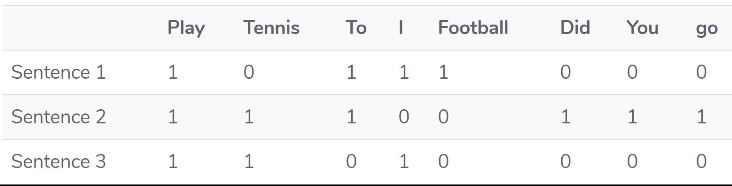

In [76]:
bow_vectorizer = CountVectorizer()
bow = bow_vectorizer.fit_transform(['one quicky lazy dog jumps over a quick jackal  and one more quick'])
pd.DataFrame(bow.toarray(),columns=bow_vectorizer.get_feature_names())


,and,dog,jackal,jumps,lazy,more,one,over,quick,quicky
0,1,1,1,1,1,1,2,1,2,1


In [77]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['cleaned_tweet'])
bow.shape

(31962, 1000)

### TF-IDF Features
This approach is called term frequency-inverse document frequency or shortly known as Tf-Idf approach of scoring.      
Idea is to rescale the frequency of words by how often they appear in all documents so that the scores for frequent words like “the” that are also frequent across all documents are penalized.

The term frequency (TF) of a word in a document:

#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)

The inverse document frequency(IDF) of the word across a set of documents.

#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).



Consider a document containing 100 words wherein the word cat appears 3 times. 

    TF for cat = (3 / 100) = 0.03

Now, assume we have 10 million documents and the word cat appears in one thousand of these. 
   
    IDF = log(10,000,000 / 1,000) = 4

Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.


In [78]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['cleaned_tweet'])
tfidf.shape

(31962, 1000)

## Model Building

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF. We will use the following algorithms to build models:

1. Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#### Bag-of-Words Features

In [80]:
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, data['label'],  
                                                          random_state=42, 
                                                          test_size=0.3)

In [81]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.555921052631579

#### TF-IDF

In [82]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [83]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.5475152571926766